<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [4]:
import pandas as pd

Load the dataset into a dataframe.


In [5]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


/tmp/ipykernel_47545/1064563953.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['ConvertedComp'], shade=True, color="skyblue")


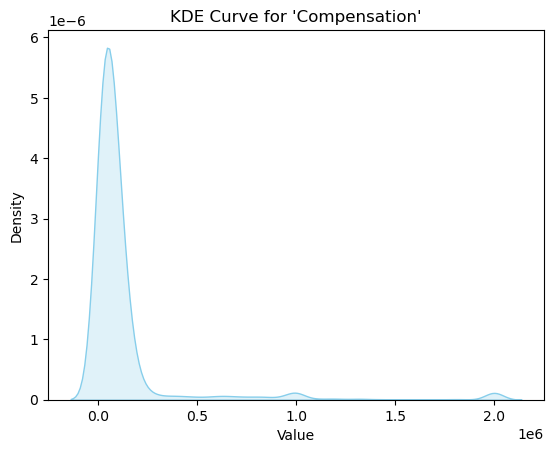

0         61000.0
1         95179.0
2         90000.0
3        455352.0
4         65277.0
           ...   
11393    130000.0
11394     19880.0
11395    105000.0
11396     80371.0
11397         NaN
Name: ConvertedComp, Length: 11398, dtype: float64

In [10]:
# your code goes here

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(df['ConvertedComp'], shade=True, color="skyblue")

plt.title("KDE Curve for 'Compensation'")
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()




Plot the histogram for the column `ConvertedComp`.


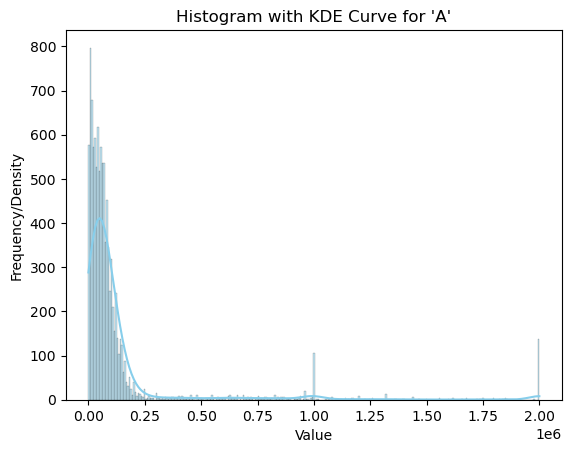

In [8]:
# your code goes here
sns.histplot(df['ConvertedComp'], kde=True, color='skyblue')

# Show the plot
plt.title("Histogram with KDE Curve for 'ConvertedComp'")
plt.xlabel('Value')
plt.ylabel('Frequency/Density')
plt.show()

What is the median of the column `ConvertedComp`?


In [15]:
# your code goes here

df['ConvertedComp'].median()


57745.0

How many responders identified themselves only as a **Man**?


In [13]:
# your code goes here

man = df[df['Gender'] == 'Man']

print(len(man))


10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [14]:
# your code goes here

df_woman = df[df['Gender'] == 'Woman']
df_woman['ConvertedComp'].median()


57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [16]:
# your code goes here
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


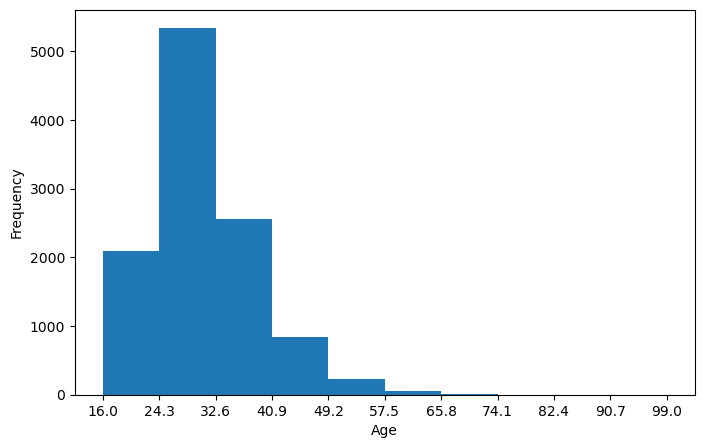

In [26]:
# your code goes here
import numpy as np

age = df['Age'].dropna()



count, bin_edges = np.histogram(age)

df['Age'].plot(kind='hist',figsize=(8, 5), xticks= bin_edges)

# Show the plot
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


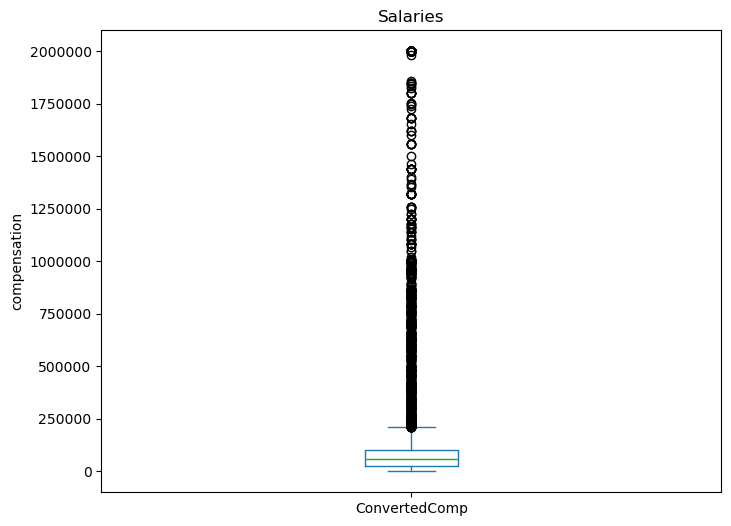

In [35]:
# your code goes here
from matplotlib.ticker import FuncFormatter

spain = df[df['Country'] == 'Spain']

# Define a formatter to display values as normal numbers with commas
def format_fn(value, tick_number):
    return f'{int(value)}'  # Format with commas

df['ConvertedComp'].plot(kind='box', figsize=(8, 6))

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_fn))

plt.title('Salaries')
plt.ylabel('compensation')

plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [37]:
# your code goes here
df['ConvertedComp'].describe()



count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

Find out the upper and lower bounds.


In [38]:
# your code goes here
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Calculate the upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Q1: {Q1}')
print(f'Q3: {Q3}')
print(f'IQR: {IQR}')
print(f'Lower Bound: {lower_bound}')
print(f'Upper Bound: {upper_bound}')

Q1: 26868.0
Q3: 100000.0
IQR: 73132.0
Lower Bound: -82830.0
Upper Bound: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [40]:
# your code goes here
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]



3         455352.0
13       1100000.0
45        229016.0
46       2000000.0
60       1000000.0
           ...    
11296     840000.0
11303    1000000.0
11350     300000.0
11353     260000.0
11369     701196.0
Name: ConvertedComp, Length: 879, dtype: float64

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


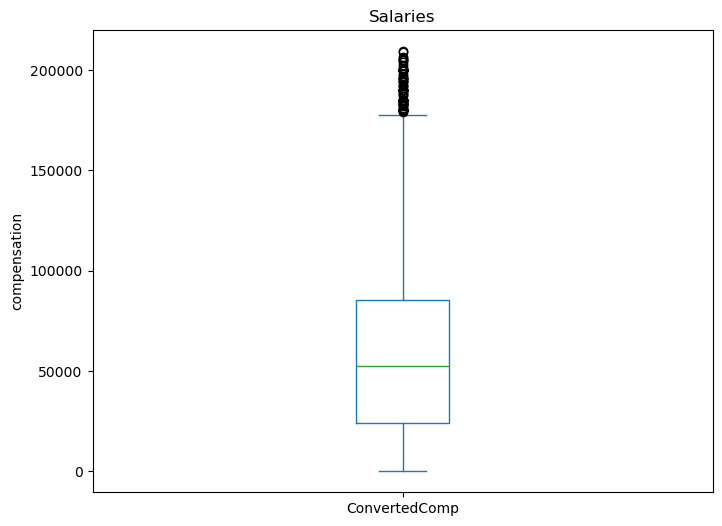

In [42]:
# your code goes here

wo_outliers =  df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# def format_fn(value, tick_number):
#     return f'{int(value)}'  # Format with commas

# wo_outliers['ConvertedComp'].plot(kind='box', figsize=(8, 6))

# plt.gca().yaxis.set_major_formatter(FuncFormatter(format_fn))

# plt.title('Salaries')
# plt.ylabel('compensation')

# plt.show()


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [45]:
# your code goes here

df_numerical = df.select_dtypes(include='number')

# Step 2: Compute the correlation between 'age' and all other numerical columns
correlation_with_age = df_numerical.corr()['Age'].drop('Age')

# Display the correlation values
print(correlation_with_age)


Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
